In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('drive/MyDrive/Recyclass/Recyclass.zip', 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/recyclass_v2'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
hdpe_dir = os.path.join(train_dir, 'hdpe')
ldpe_dir = os.path.join(train_dir, 'ldpe')
others_dir = os.path.join(train_dir, 'others')
pet_dir = os.path.join(train_dir, 'pet')
pp_dir = os.path.join(train_dir, 'pp')
ps_dir = os.path.join(train_dir, 'ps')
pvc_dir = os.path.join(train_dir, 'pvc')

In [ ]:
print('total training HDPE images:', len(os.listdir(hdpe_dir)))
print('total training LDPE images:', len(os.listdir(ldpe_dir)))
print('total training Others images:', len(os.listdir(others_dir)))
print('total training PET images:', len(os.listdir(pet_dir)))
print('total training PP images:', len(os.listdir(pp_dir)))
print('total training PS images:', len(os.listdir(ps_dir)))
print('total training PVC images:', len(os.listdir(pvc_dir)))

total training HDPE images: 105
total training LDPE images: 105
total training Others images: 105
total training PET images: 105
total training PP images: 105
total training PS images: 105
total training PVC images: 105


In [ ]:
hdpe_files = os.listdir(hdpe_dir)
print(hdpe_files[:10])

ldpe_files = os.listdir(ldpe_dir)
print(ldpe_files[:10])

others_files = os.listdir(others_dir)
print(others_files[:10])

pet_files = os.listdir(pet_dir)
print(pet_files[:10])

pp_files = os.listdir(pp_dir)
print(pp_files[:10])

ps_files = os.listdir(ps_dir)
print(ps_files[:10])

pvc_files = os.listdir(pvc_dir)
print(pvc_files[:10])

['hdpe (64).jpg', 'hdpe (26).jpg', 'hdpe (146).jpg', 'hdpe (121).jpg', 'hdpe (91).jpg', 'hdpe (111).jpg', 'hdpe (94).jpg', 'hdpe (135).jpg', 'hdpe (79).jpg', 'hdpe (127).jpg']
['ldpe (12).jpg', 'ldpe (137).jpg', 'ldpe (80).jpg', 'ldpe (34).jpg', 'ldpe (98).jpg', 'ldpe (114).jpg', 'ldpe (124).jpg', 'ldpe (117).jpg', 'ldpe (16).jpg', 'ldpe (115).jpg']
['others (30).jpg', 'others (54).jpg', 'others (72).jpg', 'others (119).jpg', 'others (70).jpg', 'others (150).jpg', 'others (10).jpg', 'others (132).jpg', 'others (76).jpg', 'others (142).jpg']
['pet (91).jpg', 'pet (145).jpg', 'pet (109).jpg', 'pet (86).jpg', 'pet (70).jpg', 'pet (102).jpg', 'pet (52).jpg', 'pet (66).jpg', 'pet (135).jpg', 'pet (118).jpg']
['pp (74).jpg', 'pp (111).jpg', 'pp (110).jpg', 'pp (66).jpg', 'pp (52).jpg', 'pp (16).jpg', 'pp (60).jpg', 'pp (77).jpg', 'pp (127).jpg', 'pp (81).jpg']
['ps (16).jpg', 'ps (91).jpg', 'ps (136).jpg', 'ps (111).jpg', 'ps (62).jpg', 'ps (112).jpg', 'ps (42).jpg', 'ps (126).jpg', 'ps (132

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 7
ncols = 7

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 7
hdpe = [os.path.join(hdpe_dir, fname) 
          for fname in hdpe_files[pic_index-7:pic_index]]
ldpe = [os.path.join(ldpe_dir, fname) 
          for fname in ldpe_files[pic_index-7:pic_index]]
others = [os.path.join(others_dir, fname) 
          for fname in others_files[pic_index-7:pic_index]]
pet = [os.path.join(pet_dir, fname) 
          for fname in pet_files[pic_index-7:pic_index]]
pp = [os.path.join(pp_dir, fname) 
          for fname in pp_files[pic_index-7:pic_index]]
ps = [os.path.join(ps_dir, fname) 
          for fname in ps_files[pic_index-7:pic_index]]
pvc = [os.path.join(pvc_dir, fname) 
          for fname in pvc_files[pic_index-7:pic_index]]

for i, img_path in enumerate(hdpe + ldpe + others + pet + pp + ps + pvc):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', 
                       include_top=False, 
                       input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
DENSE_LAYER = 512
DROPOUT_LAYER = 0.6

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(DROPOUT_LAYER)(x)
x = layers.Dense(DENSE_LAYER, activation='relu')(x)
x = layers.Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, 
              outputs=x)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 8
TARGET_SIZE = (224, 224)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    target_size=TARGET_SIZE)     

val_generator = valid_datagen.flow_from_directory(
    val_dir,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    target_size=TARGET_SIZE)

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=2)

Epoch 1/10
92/92 - 58s - loss: 0.5761 - accuracy: 0.8136 - val_loss: 0.1110 - val_accuracy: 0.9714 - 58s/epoch - 628ms/step
Epoch 2/10
92/92 - 60s - loss: 0.2152 - accuracy: 0.9279 - val_loss: 0.0741 - val_accuracy: 0.9778 - 60s/epoch - 657ms/step
Epoch 3/10
92/92 - 60s - loss: 0.1671 - accuracy: 0.9469 - val_loss: 0.1089 - val_accuracy: 0.9556 - 60s/epoch - 657ms/step
Epoch 4/10
92/92 - 60s - loss: 0.0980 - accuracy: 0.9619 - val_loss: 0.1066 - val_accuracy: 0.9587 - 60s/epoch - 650ms/step
Epoch 5/10
92/92 - 54s - loss: 0.1205 - accuracy: 0.9592 - val_loss: 0.0584 - val_accuracy: 0.9841 - 54s/epoch - 591ms/step
Epoch 6/10
92/92 - 54s - loss: 0.0740 - accuracy: 0.9701 - val_loss: 0.1421 - val_accuracy: 0.9683 - 54s/epoch - 590ms/step
Epoch 7/10
92/92 - 58s - loss: 0.0814 - accuracy: 0.9714 - val_loss: 0.0488 - val_accuracy: 0.9841 - 58s/epoch - 627ms/step
Epoch 8/10
92/92 - 58s - loss: 0.0995 - accuracy: 0.9660 - val_loss: 0.0553 - val_accuracy: 0.9873 - 58s/epoch - 630ms/step
Epoch 9/

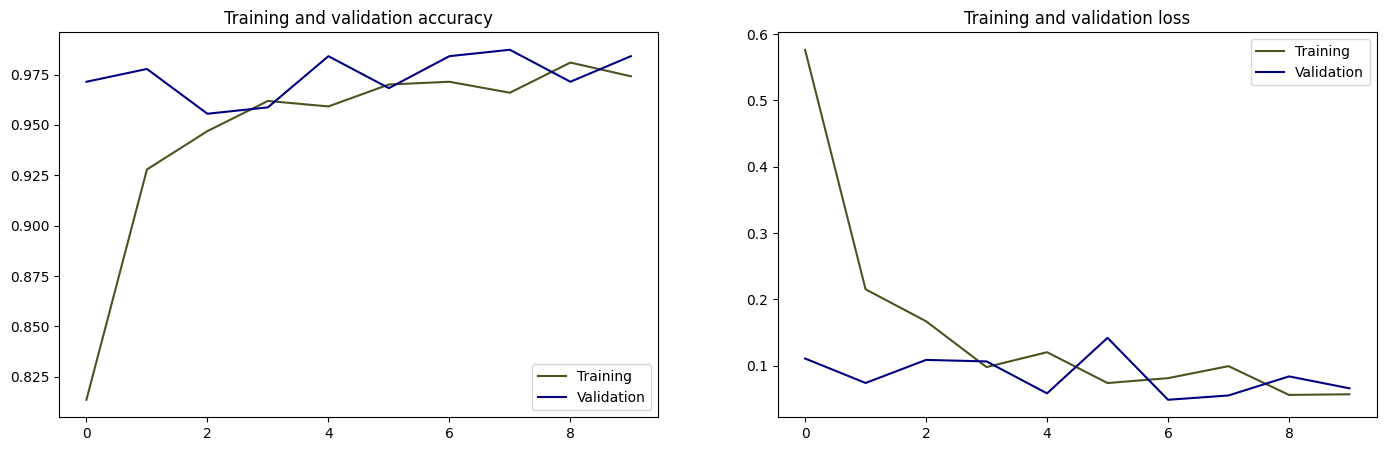

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(len(acc))
epochs_loss = range(len(loss))

fig, (acc_fig, loss_fig) = plt.subplots(1, 2, figsize=(17, 5))

acc_fig.plot(epochs_acc, acc, '#4b5320', label='Training accuracy')
acc_fig.plot(epochs_acc, val_acc, '#000080', label='Validation accuracy')
acc_fig.set_title('Training and validation accuracy')
acc_fig.legend(["Training", "Validation"], loc ="lower right")

loss_fig.plot(epochs_loss, loss, '#4b5320', label='Training loss')
loss_fig.plot(epochs_loss, val_loss, '#000080', label='Validation loss')
loss_fig.set_title('Training and validation loss')
loss_fig.legend(["Training", "Validation"], loc ="upper right")

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  
  print('HDPE', '{:.3f}'.format(classes[0, 0]))
  print('LDPE', '{:.3f}'.format(classes[0, 1]))
  print('Others', '{:.3f}'.format(classes[0, 2]))
  print('PET', '{:.3f}'.format(classes[0, 3]))
  print('PP', '{:.3f}'.format(classes[0, 4]))
  print('PS', '{:.3f}'.format(classes[0, 5]))
  print('PVC', '{:.3f}'.format(classes[0, 6]))

Saving pvc (1).jpg to pvc (1).jpg
1/1 [==============================] - 1s 647ms/step
pvc (1).jpg
HDPE 0.020
LDPE 0.000
Others 0.002
PET 0.148
PP 0.000
PS 0.000
PVC 0.831


In [ ]:
model.save('Recyclass using MobileNetV2 with ImageDataGenerator.h5')

In [ ]:
from tensorflow import keras

model_path = 'drive/MyDrive/Recyclass/Recyclass using MobileNetV2 with ImageDataGenerator.h5'
model = keras.models.load_model(model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs

output_dir = 'tensorflowjs'
tfjs.converters.save_keras_model(model, output_dir)

In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

label = ['hdpe', 'ldpe', 'others', 'pet', 'pp', 'ps', 'pvc']

with open('label.txt', 'w') as f:
    f.write('\n'.join(label))